In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%ls
%cd /content/gdrive/MyDrive/FYP-DAssist/project
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Meta/  Meta.csv  my_model.h5  Test/  Test.csv  Train/  Train.csv
/content/gdrive/MyDrive/FYP-DAssist/project
'archive (2).zip'                     dataset/
'archive (2).zip (Unzipped Files)'/   my_model.h5
'Copy of archive (2).zip'            'Traffic sign classification'/


In [ ]:
!pip install  keras
!pip install  keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(39239, 30, 30, 3) (39239,)
(31391, 30, 30, 3) (7848, 30, 30, 3) (31391,) (7848,)
Epoch 1/15
981/981 [==============================] - 133s 135ms/step - loss: 2.0672 - accuracy: 0.4748 - val_loss: 0.5985 - val_accuracy: 0.8410
Epoch 2/15
981/981 [==============================] - 130s 132ms/step - loss: 0.7140 - accuracy: 0.7942 - val_loss: 0.2002 - val_accuracy: 0.9548
Epoch 3/15
981/981 [==============================] - 131s 134ms/step - loss: 0.4718 - accuracy: 0.8622 - val_loss: 0.1838 - val_accuracy: 0.9483
Epoch 4/15
981/981 [==============================] - 129s 132ms/step - loss: 0.3683 - accuracy: 0.8939 - val_loss: 0.1096 - val_accuracy: 0.9704
Epoch 5/15
981/981 [==============================] - 130s 132ms/step - loss: 0.3070 - accuracy: 0.9141 - val_loss: 0.0750 - val_accuracy: 0.9801
Epoch 6/15
981/981 [==============================] - 132s 134ms/step - loss: 0.2667 - accuracy: 0.9244 - val_loss: 0.0545 - val_accuracy: 0.9846
Epoch 7/15
981/981 [======================

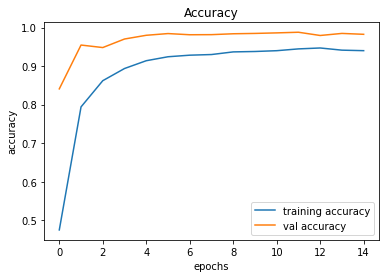

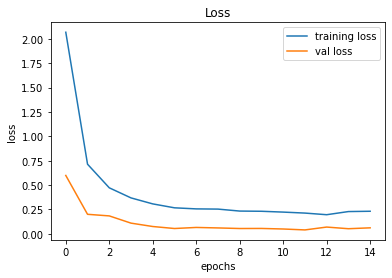

FileNotFoundError: ignored

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
#cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('dataset/Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


In [ ]:
from sklearn.metrics import accuracy_score


y_test = pd.read_csv('dataset/Test.csv')
%ls
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
%cd dataset
for img in imgs:
    print (img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Streaming output truncated to the last 5000 lines.
Test/05149.png
Test/05150.png
Test/05151.png
Test/05152.png
Test/05153.png
Test/05154.png
Test/05155.png
Test/05156.png
Test/05157.png
Test/05158.png
Test/05159.png
Test/05160.png
Test/05161.png
Test/05162.png
Test/05163.png
Test/05164.png
Test/05165.png
Test/05166.png
Test/05167.png
Test/05168.png
Test/05169.png
Test/05170.png
Test/05171.png
Test/05172.png
Test/05173.png
Test/05174.png
Test/05175.png
Test/05176.png
Test/05177.png
Test/05178.png
Test/05179.png
Test/05180.png
Test/05181.png
Test/05182.png
Test/05183.png
Test/05184.png
Test/05185.png
Test/05186.png
Test/05187.png
Test/05188.png
Test/05189.png
Test/05190.png
Test/05191.png
Test/05192.png
Test/05193.png
Test/05194.png
Test/05195.png
Test/05196.png
Test/05197.png
Test/05198.png
Test/05199.png
Test/05200.png
Test/05201.png
Test/05202.png
Test/05203.png
Test/05204.png
Test/05205.png
Test/05206.png
Test/05207.png
Test/05208.png
Test/05209.png
Test/05210.png
Test/05211.png
Test